## Aufgabe: Crawler

**Aufgabe:**

- Passe den ArticleFetcher so an, dass er die Informationen aus allen Seiten extrahiert

Hier nochmal die URL: http://python.beispiel.programmierenlernen.io/index.php

**Tipps:**

- Schau dir zuerst an, wie du den Button "Zur nächsten Seite" ansteuern kannst.
- Wie greifst du von Python aus auf das "href" - Attribut dieses Buttons zu?
- (Optional): Probier ggf. zuerst, nur die Infos der ersten 2 Seiten zu holen. Kannst du darauf aufbauend das Programm verallgemeinern, so dass es alle Seiten einliest?
- Du kannst dich daran orientieren, ob es einen "Zur nächsten Seite"-Button gibt, oder nicht. Wenn es diesen Button nicht mehr gibt, bist du auf der letzten Seite angelangt. Welcher Schleifentyp bietet sich hier an, wenn du die Schleife erst dann stoppen willst, wenn es den Button nicht mehr gibt?

In [10]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

import time

#Colore Ausgabe
from colorama import Fore, Back

# Bosch Proxy
import os
os.environ['http_proxy'] = "rb-proxy-de.bosch.com:8080" 
os.environ['https_proxy'] = "rb-proxy-special.bosch.com:8080" 

In [34]:
class CrawledArticle():
    def __init__(self, title, emoji, content, image):
        self.title = title
        self.emoji = emoji
        self.content = content
        self.image = image
        
class ArticleFetcher():
    def fetch(self):
        # Alle Atrikel aller Seiten
        articles = []
        
        nextPage = True
        page = ""
        
        while nextPage:
            site = "http://python.beispiel.programmierenlernen.io/index.php"
            url = urljoin(site, page)
           # print (Fore.RED + "debug-url: " + url)
            time.sleep(1)
            print(url)
            r = requests.get(url)
            doc = BeautifulSoup(r.text, "html.parser")

            print(Fore.RED + "DEBUG - print doc:" + str(doc))
            for card in doc.select(".card"):
                emoji = card.select_one(".emoji").text
                content = card.select_one(".card-text").text
                title = card.select(".card-title span")[1].text
                image = urljoin(url, card.select_one("img").attrs["src"])

                crawled = CrawledArticle(title, emoji, content, image)
                articles.append(crawled)
            
            print(Fore.RED + "DEBUG - .navigation .btn-primary:"  + str(doc.select(".navigation .btn-primary")))
            button = doc.select(".navigation .btn-primary").attrs["href"]
            print("debug-button: " + button)
                
        return articles

http://python.beispiel.programmierenlernen.io/index.php
DEBUG - print doc:<html><head>
<title>Access Denied</title>
</head>
<body>

<blockquote>
<table border="0" cellpadding="1" width="700Px">
<tr><td>
<font face="Helvetica" size="3">
						Sorry, your credentials could not be authenticated: "Credentials are missing.". You will not be permitted access until your credentials can be verified.<br/></font>
<font face="Helvetica" size="2">
						This is typically caused by an incorrect username and/or password, but could also be caused by network problems.
					</font>
<br/><br/><br/>
<font face="Helvetica" size="2">
						For assistance, please provide the content of this page to: <br/><ul type="square"><li><b>BOSCH CI-Hotline</b>: +49 (711) 811 3311 / <a href="mailto:CI-Hotline@de.bosch.com">CI-Hotline</a><br/>  <u>For SMT:</u> <u>Product Name</u> &amp; <u>Initiator Script</u>: Internet Web Access<br/><br/><li><b>BSH Service Desk</b>: +48 (42) 274 4444 or the local speed dial number / <a
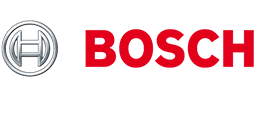

AttributeError: 'list' object has no attribute 'attrs'

In [35]:
fetcher = ArticleFetcher()
fetcher.fetch()